<a href="https://colab.research.google.com/github/farshadabdulazeez/CreativeAI-Text-to-Image-Image-to-Text-Generation-with-Stable-Diffusion-and-BLIP/blob/main/CreativeAI_Text_to_Image_Image_to_Text_Generation_with_Stable_Diffusion_and_BLIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Setup & Installation**

In [1]:
# Install required libraries
!pip install diffusers transformers accelerate matplotlib torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 48.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
# Import necessary libraries
from diffusers import StableDiffusionPipeline
from transformers import BlipProcessor, BlipForConditionalGeneration
import matplotlib.pyplot as plt
import torch

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

# **Model Initialization**
**We will use two models:**



1.   Stable Diffusion for Text-to-Image generation.
2.   BLIP (Bootstrapped Language-Image Pre-training) for Image-to-Text generation.




In [3]:
# Check GPU availability
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"[DEVICE]: {device}")

[DEVICE]: cuda


In [4]:
# Load Stable Diffusion model
model_id = "dreamlike-art/dreamlike-diffusion-1.0"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, use_safetensors=True)
pipe = pipe.to(device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

text_encoder%2Fconfig.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

tokenizer%2Fmerges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler%2Fscheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

tokenizer%2Fspecial_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer%2Ftokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

(…)ure_extractor%2Fpreprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

tokenizer%2Fvocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet%2Fconfig.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

vae%2Fconfig.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [5]:
# Load BLIP model for Image-to-Text
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
blip_model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base").to(device)

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

# **Text-to-Image Generation**

In [6]:
#helper function
def generate_image(pipe, prompt, params):
    """
    Generate an image from a text prompt using Stable Diffusion.

    Args:
        pipe: StableDiffusionPipeline instance
        prompt (str): Text prompt for image generation
        params (dict): Parameters like num_inference_steps, height, width, etc.

    Returns:
        None (displays the generated image(s))
    """
    # Generate image(s)
    output = pipe(prompt, **params)
    images = output.images

    # Display images
    num_images = len(images)
    if num_images > 1:
        fig, ax = plt.subplots(1, num_images, figsize=(5 * num_images, 5))
        for i in range(num_images):
            ax[i].imshow(images[i])
            ax[i].axis('off')
    else:
        plt.figure(figsize=(5, 5))
        plt.imshow(images[0])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

**Exploring Stable Diffusion Parameters**

**1. Basic Prompt**

Generate an image with default parameters.

  0%|          | 0/50 [00:00<?, ?it/s]

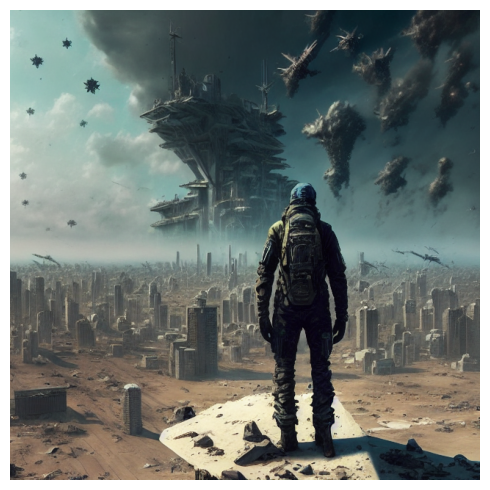

In [15]:
prompt = "A lone survivor standing on top of an abandoned skyscraper, watching the sky filled with swarming alien drones."
params = {}

generate_image(pipe, prompt, params)

**2. Customizing Inference Steps**

Increase the number of inference steps for higher quality.

  0%|          | 0/100 [00:00<?, ?it/s]

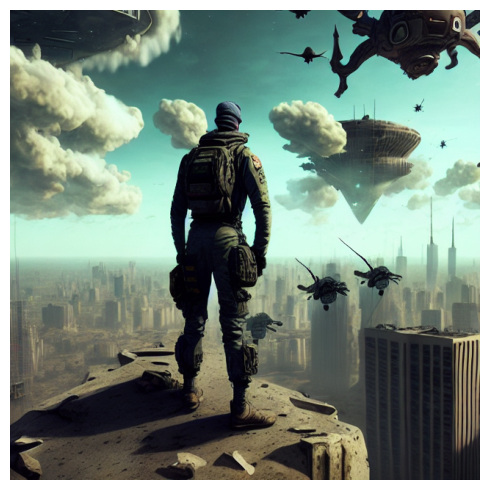

In [16]:
params = {'num_inference_steps': 100}

generate_image(pipe, prompt, params)

**3. Adjusting Image Dimensions**

Change the height and width of the generated image.

  0%|          | 0/100 [00:00<?, ?it/s]

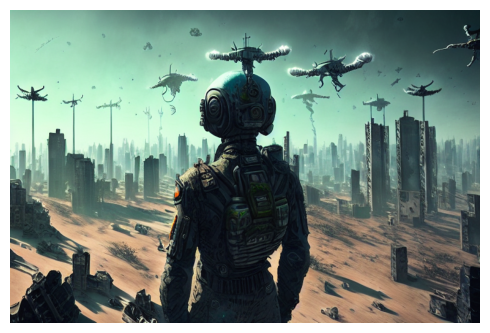

In [17]:
params = {'num_inference_steps': 100, 'width': 768, 'height': 512}
generate_image(pipe, prompt, params)

**4. Generating Multiple Images**

Generate multiple images from the same prompt.

  0%|          | 0/100 [00:00<?, ?it/s]

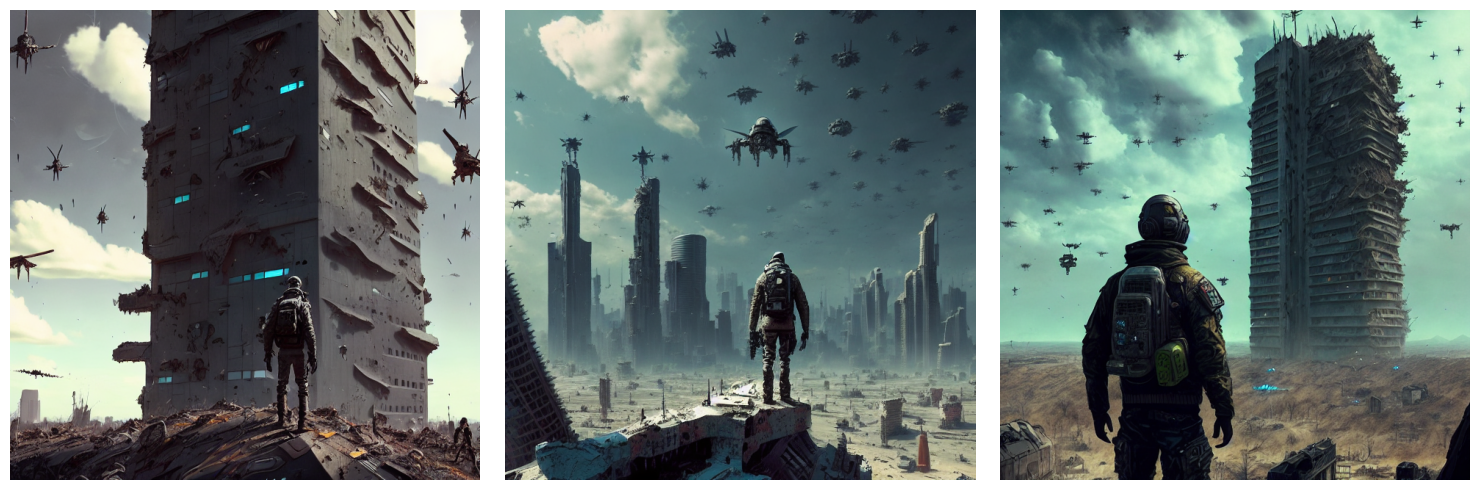

In [18]:
params = {'num_inference_steps': 100, 'num_images_per_prompt': 3}
generate_image(pipe, prompt, params)

**5. Using Negative Prompts**

Exclude undesirable features using negative prompts.

  0%|          | 0/100 [00:00<?, ?it/s]

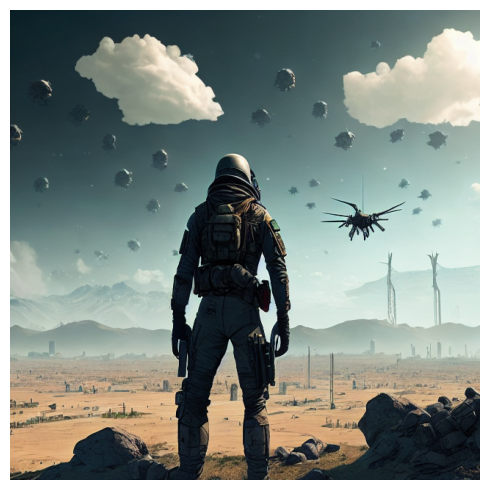

In [20]:
params = {
    'num_inference_steps': 100,
    'negative_prompt': 'blurry, low quality, distorted'
}
generate_image(pipe, prompt, params)

# **Image-to-Text Generation**

In [22]:
#helper function
def generate_text_from_image(image, processor, model):
    """
    Generate a text description for an image using BLIP.

    Args:
        image (PIL.Image): Input image
        processor: BLIP processor
        model: BLIP model

    Returns:
        str: Generated text description
    """
    inputs = processor(image, return_tensors="pt").to(device)
    out = model.generate(**inputs)
    return processor.decode(out[0], skip_special_tokens=True)

  0%|          | 0/100 [00:00<?, ?it/s]

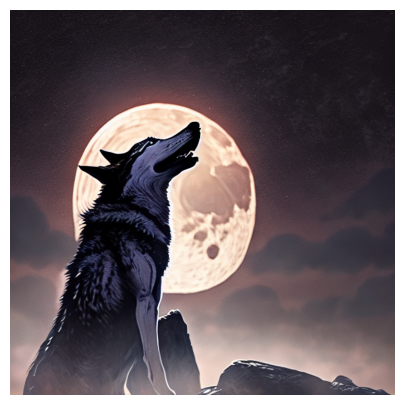

[IMAGE DESCRIPTION]: a wolf standing on a rock with a full moon in the background


In [26]:
# Generate an image
prompt = "A cinematic shot of a lone wolf howling under a full moon."
params = {'num_inference_steps': 100}
output = pipe(prompt, **params)
image = output.images[0]

# Display the image
plt.figure(figsize=(5, 5))
plt.imshow(image)
plt.axis('off')
plt.show()

# Generate text description
text_description = generate_text_from_image(image, processor, blip_model)
print(f"[IMAGE DESCRIPTION]: {text_description}")

**Generate multiple images and their corresponding text descriptions in a batch.**

[PROMPT 1]: A futuristic cityscape at sunset.


  0%|          | 0/100 [00:00<?, ?it/s]

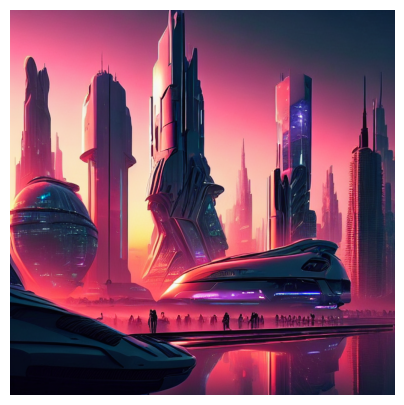

[DESCRIPTION 1]: futuristic city wallpapers by theartion

[PROMPT 2]: A serene beach with turquoise water and palm trees.


  0%|          | 0/100 [00:00<?, ?it/s]

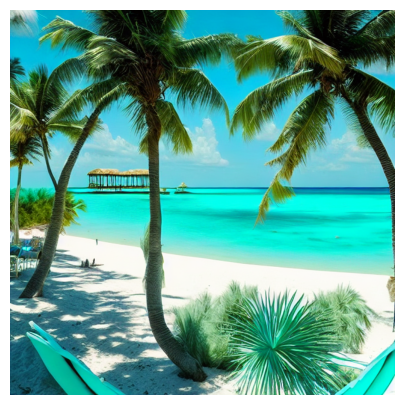

[DESCRIPTION 2]: a beach with palm trees and a dock

[PROMPT 3]: A medieval knight riding a horse through a dense forest.


  0%|          | 0/100 [00:00<?, ?it/s]

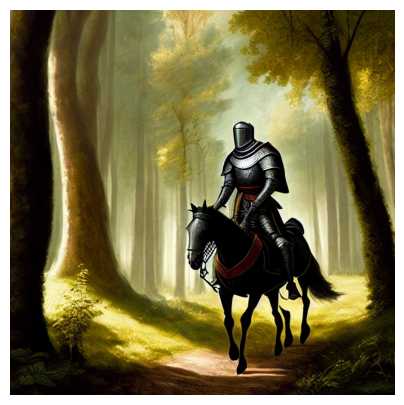

[DESCRIPTION 3]: a man riding a horse through a forest



In [27]:
prompts = [
    "A futuristic cityscape at sunset.",
    "A serene beach with turquoise water and palm trees.",
    "A medieval knight riding a horse through a dense forest."
]

for idx, prompt in enumerate(prompts):
    print(f"[PROMPT {idx + 1}]: {prompt}")
    params = {'num_inference_steps': 100}
    output = pipe(prompt, **params)
    image = output.images[0]

    # Display image
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    # Generate text description
    text_description = generate_text_from_image(image, processor, blip_model)
    print(f"[DESCRIPTION {idx + 1}]: {text_description}\n")

**Save generated images and their descriptions to a folder.**

In [28]:
import os

output_dir = "generated_results"
os.makedirs(output_dir, exist_ok=True)

for idx, prompt in enumerate(prompts):
    params = {'num_inference_steps': 100}
    output = pipe(prompt, **params)
    image = output.images[0]

    # Save image
    image_path = os.path.join(output_dir, f"image_{idx + 1}.png")
    image.save(image_path)

    # Generate text description
    text_description = generate_text_from_image(image, processor, blip_model)

    # Save description
    with open(os.path.join(output_dir, f"description_{idx + 1}.txt"), "w") as f:
        f.write(text_description)

    print(f"[SAVED] Image and Description {idx + 1}")

  0%|          | 0/100 [00:00<?, ?it/s]

[SAVED] Image and Description 1


  0%|          | 0/100 [00:00<?, ?it/s]

[SAVED] Image and Description 2


  0%|          | 0/100 [00:00<?, ?it/s]

[SAVED] Image and Description 3
